### 게 나이 예측 경진대회

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [3]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")
train_df.shape, test_df.shape

((74051, 10), (49368, 9))

### 훈련셋 살펴보기

In [4]:
print(train_df.keys()) # 컬럼명 확인

train_df.head() # 최초 5행 살펴보기.

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
train_df.info() # 범주형 자료형 하나, 나머지는 int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [6]:
train_df.isna().sum() # 결측치 없음

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [7]:
# 성별이 어떤 값들로 이뤄져있는지 확인.
train_df["Sex"].unique()

# I : Indeterminate, M : Male, F : Female

array(['I', 'M', 'F'], dtype=object)

In [8]:
train_df['Sex'].value_counts() # 각 성별의 분포 확인

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

<AxesSubplot: ylabel='Count'>

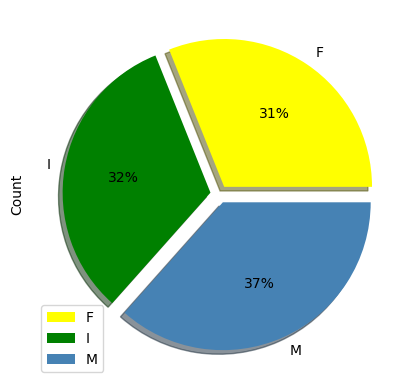

In [9]:
# 파이차트로 각 성별의 비율 알아보기
colors = ["yellow", "green", "steelblue"]
explode = (0.06, 0.06, 0.06)
train_df["Sex"].value_counts().to_frame(name="Count").sort_values(by=["Count"]).plot(kind = "pie", y = "Count", colors = colors, explode = explode, autopct = "%1.0f%%", shadow=True)

<Figure size 1200x1000 with 0 Axes>

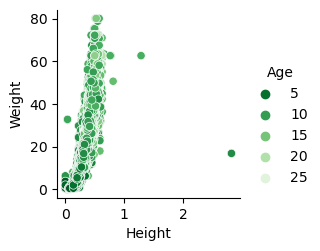

In [10]:
# 특정 변수들 간의 상관관계 살펴보기
plt.figure(figsize = (12, 10))
sns.pairplot(train_df, x_vars = ["Height"], y_vars = ["Weight"], hue = "Age", kind = "scatter", palette = "Greens_r")
# 비선형 관계 포착

<Figure size 1200x1000 with 0 Axes>

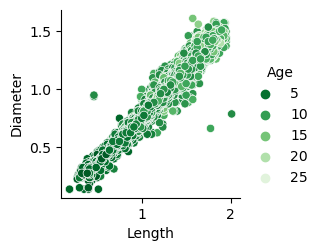

In [11]:
plt.figure(figsize = (12, 10))
sns.pairplot(train_df, x_vars = ["Length"], y_vars = ["Diameter"], hue = "Age", kind = "scatter", palette = "Greens_r")
# 선형관계가 포착됨과 동시에 몇 이상치가 발견

<AxesSubplot: >

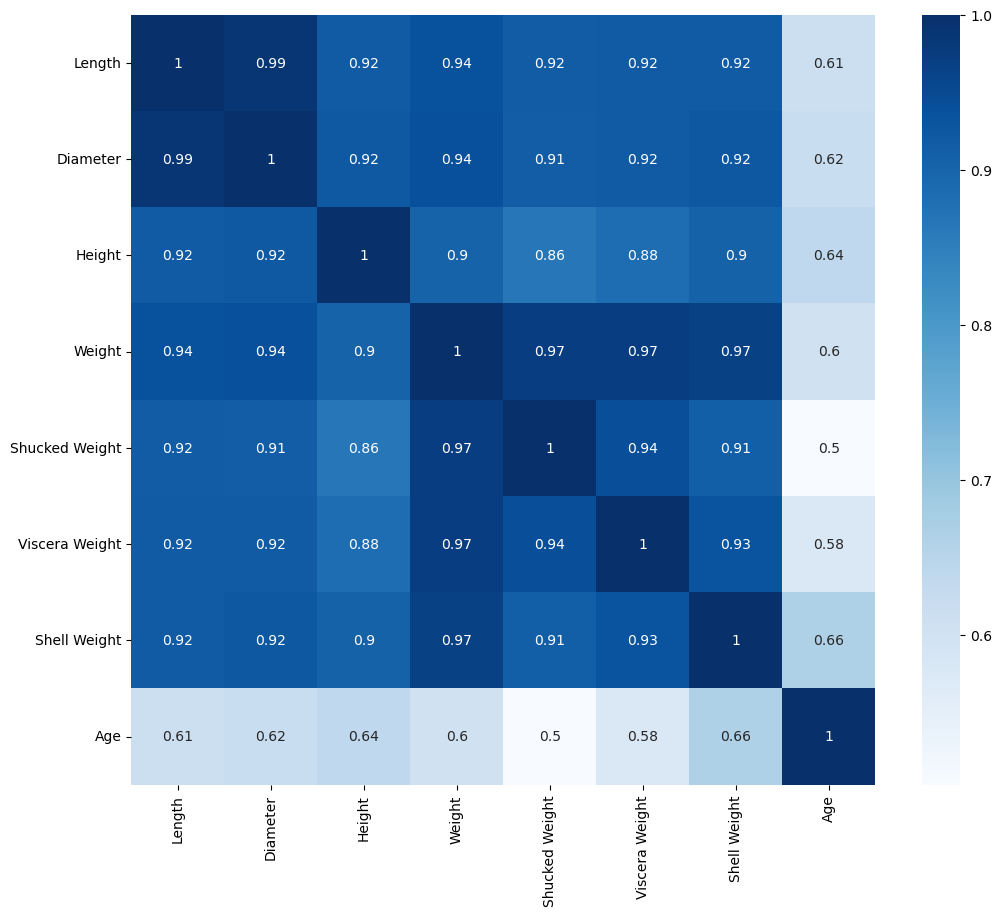

In [12]:
# 상관관계 히트맵으로 상관계수 확인
plt.figure(figsize = (12, 10))
sns.heatmap(train_df.drop(["id"], axis = 1).corr(), annot = True, cmap = "Blues")

### 이상치 탐색하기
박스 플롯으로 이상치를 탐색한다. 박스 플롯의 경우에는 다섯가지의 통계를 포함하고 있다.

<div align = center><img src = ./Data/explane_boxplot.png></div>

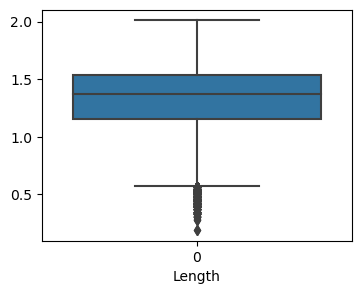

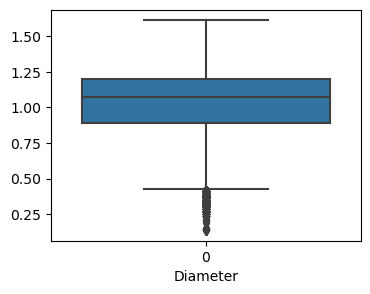

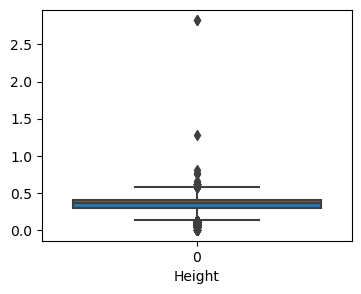

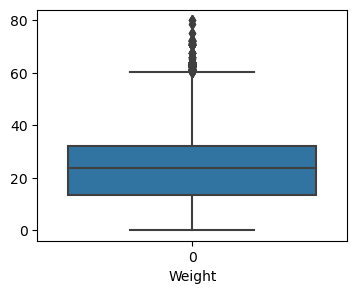

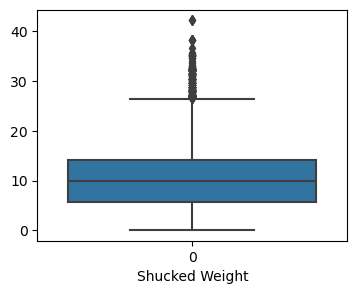

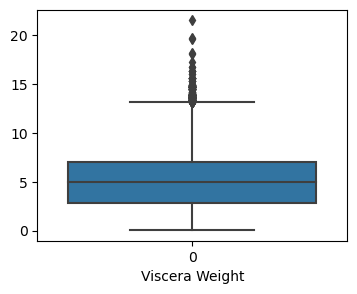

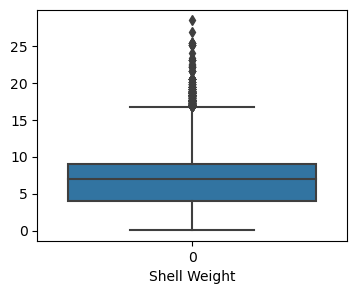

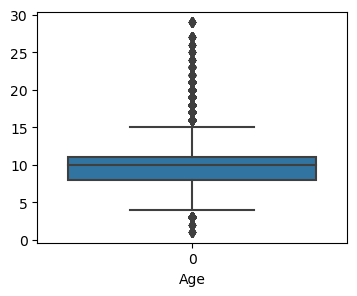

In [13]:
plt_cols = list(train_df.columns)
plt_cols.remove("id")
plt_cols.remove("Sex")
plt_cols

for col_name in plt_cols:
    plt.figure(figsize = (4, 3))
    sns.boxplot(train_df[col_name])
    plt.xlabel(col_name)

### 이상치 제거하기
박스 플롯에서 탐지되는 이상치들을 제거합니다.

In [14]:
train_df = train_df.drop(train_df[train_df["Length"] < 0.35].index)
train_df = train_df.drop(train_df[train_df["Diameter"] < 0.2].index)
train_df = train_df.drop(train_df[train_df["Height"] > 1.2].index)
train_df = train_df.drop(train_df[train_df["Weight"] > 70].index)
train_df = train_df.drop(train_df[train_df["Shucked Weight"] > 40].index)
train_df = train_df.drop(train_df[train_df["Viscera Weight"] > 18].index)
train_df = train_df.drop(train_df[train_df["Shell Weight"] > 25].index)

### 범주형 변수 처리하기(선택)
범주형 변수를 라벨링합니다. 이 때 one-hot-encoding 혹은 라벨링을 진행합니다. 이번에는 단순 라벨링을 진행합니다.

In [15]:
train_df["Sex"] = train_df["Sex"].map({"M" : 0, "F" : 1, "I" : 2})

In [16]:
# 전처리가 완료된 데이터의 형상을 확인합니다.
train_df # 이상치가 제거되면서 컬럼 번호와 행의 개수가 다른 모습을 확인할 수 있습니다.

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,1,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,2,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,1,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,2,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


### 훈련 데이터 준비
모델 훈련을 위한 데이터를 준비합니다.

In [17]:
X = train_df.drop("Age", axis = 1) # Input data
y = train_df[["Age"]] # target. 2차원 데이터로 구성하기 위해서 train_df[["Age"]]로 할당.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [19]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(59158, 9) (14790, 9)
(59158, 1) (14790, 1)


### Base Model Selection
모델링을 시작합니다.

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### 예측, 평가
예측을 진행하고, 평가 지표를 출력합니다.

In [21]:
from sklearn.metrics import mean_absolute_error

y_pred1 = rfr.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred1)
print(f"MAE값 : {round(mae1, 5)}")

MAE값 : 1.46787


### 다른 모델의 성능 확인하기
MAE의 경우 관측치와 예측값의 차이에 대한 절대값입니다. 위의 값은 오차가 약간 큰 편인듯 합니다. 

xgboost 회귀 모델을 사용합니다. 하이퍼파라미터의 의미는 아래를 참고하세요.

|하이퍼 파라미터|설명|
|---|---|
|n_estimators|트리의 개수를 지정한다. 높을 수록 성능이 좋지만, 과한 경우 학습시간이 오래 걸릴 수 있다.|
|learning_rate|각 트리가 이전 트리의 오차를 얼마나 강하게 보정할지 결정한다. 작은 값일 수록 정확도가 올라가지만, 시간이 오래걸릴 수 있다.|
|max_depth|트리의 깊이를 결정하는 요인. 모델의 복잡도를 조절하는데 사용한다. 깊이가 너무 깊으면 과적합의 원인이 된다.|
|reg_alpha/lambda|L1, L2 규제를 적용한다. 과적합을 제어하는 데 사용된다.|
|gamma|트리의 리프 노드를 추가 분할할지 결정하는데 사용되는 최소 손실 감소 값이다. 작은 값으로 설정하면 더 많은 분할이 이루어지므로 모델이 더 복잡해진다.|

In [22]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### 예측, 평가하기

In [23]:
y_pred2 = xgb.predict(X_test)
mae2 = mean_absolute_error(y_pred2, y_test)
print(f"MAE 값 : {mae2}")

MAE 값 : 1.404532628352776


### 다른 모델 살펴보기
CatBoost모델의 경우, 범주형 데이터에 대해 별도의 인코딩 과정 없이 데이터를 바로 넣어도 모델의 내부에서 자동적으로 처리를 진행합니다.

```
$ pip install catboost
```

In [24]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(learning_rate = 0.05, verbose = False, random_state = 0)
cbr.fit(X_train, y_train)

In [25]:
y_pred3 = cbr.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred3)
print(f"MAE 값 : {mae3}")

MAE 값 : 1.4042807919986822


### 의사결정 트리

In [26]:
from sklearn.tree import DecisionTreeRegressor

dc = DecisionTreeRegressor(random_state=42)
dc.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
y_pred4 = dc.predict(X_test)

mae4 = mean_absolute_error(y_test, y_pred4)
print(f"MAE 값 : {mae4}")

MAE 값 : 2.013455037187289


### 성능 비교
각 모델별 성능을 mae 지표를 통해 비교하여 시각화합니다.

In [28]:
models = ["RandomForestRegressor", "XGBRegressor", "CatBoostRegressor", "DecisionTreeRegressor"]
mae = [mae1, mae2, mae3, mae4]
data={'Models' : models, 'MAE' : mae}
pd.DataFrame(data).style.background_gradient(cmap = "Blues_r")

,Models,MAE
0,RandomForestRegressor,1.467869
1,XGBRegressor,1.404533
2,CatBoostRegressor,1.404281
3,DecisionTreeRegressor,2.013455


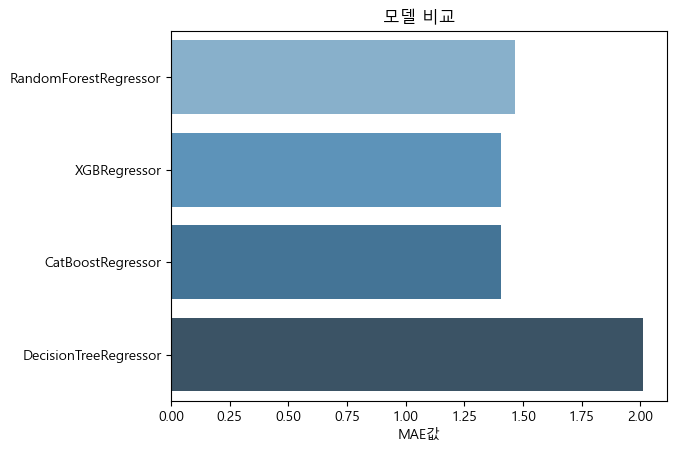

In [29]:
import matplotlib as mlp
mlp.rcParams["font.family"] = "Malgun Gothic"

plt.title("모델 비교")
plt.xlabel("MAE값")
sns.barplot(x = mae, y = models, palette = "Blues_d")
plt.show()